Load data and libraries

In [1]:
# Upload the local data file to colab
from google.colab import files
uploaded = files.upload()

In [4]:
# Installation of necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install geneview
!pip install gprofiler-official
!pip install statsmodels
!pip install scikit-learn
!pip install lifelines
!pip install gseapy
!pip install scikit-learn==1.5.2
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geneview: filename=geneview-0.2.1-py3-none-any.whl size=54470 sha256=b557283d73e02d99a621f86e642833f72b8ffee77b03a882859bf414b58d8db9
  Stored in directory: /root/.cache/pip/wheels/91/cb/65/81dafd0254adb97b0938e9c3da9c2c74a8e6169e4595437ca7
Successfully built geneview
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 6.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=19a4ae2a4271a35fe8658b4279451bec96055116834d6bddf153a9794b4aec98
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 8.2 MB/s eta 0:00:00


In [5]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geneview
from gprofiler import GProfiler
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Read the data in the glioma_mskcc_2019_clinical_data_simpler.csv file into a dataframe
df = pd.read_csv('processed_clinical_data_with_idh_status.csv', sep=",")


In [52]:
# show df
df

,Patient ID,Hugo_Symbol,Entrez_Gene_Id,Consequence,Tumor_Sample_Barcode,HGVSp_Short,Hotspot,Pathway,Study ID,Sample ID,...,Sample Type,Sex,Somatic Status,Surgery Date Relative to Dx (Months),TMB (nonsynonymous),TMZ Hypermutated,Tumor Surgery Number,WHO Classification of Diagnostic Tumor,WHO Grade,IDH Status
0,P-0000223,ATRX,546.0,frameshift_variant,P-0000223-T01-IM3,p.T1821Qfs*7,0,Astrocytic drivers,glioma_mskcc_2019,P-0000223-T01-IM3,...,Recurrence,Female,Matched,126.000,5.545777,No,3.0,"Diffuse astrocytoma, IDH-mutant",G3,IDH WT
1,P-0000378,EGFR,1956.0,missense_variant,P-0000378-T01-IM3,p.G239C,0,RTK-RAS,glioma_mskcc_2019,P-0000378-T01-IM3,...,Primary,Male,Matched,0.000,5.545777,No,1.0,"Glioblastoma, IDH-wildtype",G4,IDH WT
2,P-0000486,ARID1B,57492.0,frameshift_variant,P-0000486-T01-IM3,p.P929Qfs*10,0,Chromatin remodeling,glioma_mskcc_2019,P-0000486-T01-IM3,...,Recurrence,Female,Matched,77.500,3.327466,No,2.0,"Oligodendroglioma, IDH-mutant and 1p/19q-codel...",G3,IDH WT
3,P-0000500,ALK,238.0,missense_variant,P-0000500-T01-IM3,p.P1466L,0,none,glioma_mskcc_2019,P-0000500-T01-IM3,...,Recurrence,Male,Matched,51.600,115.352151,Yes,2.0,"Glioblastoma, IDH-wildtype",G4,IDH WT
4,P-0000572,ARID1A,8289.0,frameshift_variant,P-0000572-T01-IM3,p.M1154Wfs*7,0,Chromatin remodeling,glioma_mskcc_2019,P-0000572-T01-IM3,...,Primary,Male,Matched,0.000,7.764087,No,1.0,"Glioblastoma, IDH-wildtype",G4,IDH WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,TRF079053,BAP1,8314.0,missense_variant,TRF079053,p.C649Y,0,none,glioma_mskcc_2019,TRF079053,...,Primary,Female,Unmatched,0.000,6.677785,No,1.0,"Diffuse astrocytoma, IDH-mutant",G2,IDH WT
837,TRF079056,ARID1B,57492.0,inframe_insertion,TRF079056,p.G220_G221insR,0,Chromatin remodeling,glioma_mskcc_2019,TRF079056,...,Primary,Male,Unmatched,0.000,6.677785,No,1.0,"Glioblastoma, IDH-mutant",G4,IDH WT
838,TRF083668,IDH1,3417.0,missense_variant,TRF083668,p.R132H,0,none,glioma_mskcc_2019,TRF083668,...,Primary,Female,Unmatched,0.000,2.504169,No,1.0,"Anaplastic oligodendroglioma, IDH-mutant and 1...",G3,IDH Mutant
839,TRF102171,BCORL1,63035.0,missense_variant,TRF102171,p.D1284N,0,none,glioma_mskcc_2019,TRF102171,...,Primary,Female,Unmatched,0.000,9.181955,No,1.0,"Glioblastoma, IDH-wildtype",G4,IDH WT


Clustering
Unsupervised Clustering of Molecular Subtypes
   - Goal: Discover molecular subtypes of the cancer based on mutation patterns and clinical features.
   - Features to Use: `Hugo_Symbol` (one-hot encoded for multiple mutations), `Pathway`, `IDH Status`, `WHO Grade`, `Enhancing`, `Sample Type`, `TMB`, `Fraction Genome Altered`.
   - Approach:Use algorithms like K-Means, Hierarchical Clustering, or DBSCAN for clustering. Apply dimensionality reduction techniques like PCA to visualize the clusters.
   -Evaluation:Examine how clusters correlate with clinical features such as survival outcomes, IDH status, or WHO Grade

In [53]:
# Step 1: Filter for primary tumor samples
df_primary = df[df['Sample Type'] == 'Primary']

# Step 2: Group data by 'Patient ID' and handle multiple mutations
# Aggregating Hugo_Symbol as a list of unique mutations for each patient
df_grouped = df_primary.groupby('Patient ID').agg({
    'Hugo_Symbol': lambda x: list(set(x)),
    'Pathway': 'first',
    'Enhancing': 'first',
    'WHO Grade': 'first',
    'IDH Status': 'first',
    'Diagnosis Age': 'first',
    'TMB (nonsynonymous)': 'first',
    'Fraction Genome Altered': 'first',
}).reset_index()
assert df_grouped['Patient ID'].is_unique, "Duplicate patient records found after grouping."
print(f"Grouped data shape: {df_grouped.shape}")

Grouped data shape: (670, 9)


In [54]:
# Step 3: Encoding Hugo_Symbol (one-hot encoding for mutated genes)
# Create a binary representation for each mutated gene across patients
unique_genes = list({gene for genes in df_grouped['Hugo_Symbol'] for gene in genes})
gene_encoder = pd.DataFrame(0, index=df_grouped.index, columns=unique_genes)

# Update gene_encoder with presence of each gene for each patient
for i, genes in enumerate(df_grouped['Hugo_Symbol']):
    gene_encoder.loc[i, genes] = 1

# Quality check: Ensure one-hot encoding was successful
assert not gene_encoder.isnull().values.any(), "Missing values detected in gene encoding."

In [55]:
df_grouped

,Patient ID,Hugo_Symbol,Pathway,Enhancing,WHO Grade,IDH Status,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered
0,P-0000378,[EGFR],RTK-RAS,None,G4,IDH WT,55.0,5.545777,0.1996
1,P-0000572,[ARID1A],Chromatin remodeling,None,G4,IDH WT,59.0,7.764087,NaN
2,P-0000588,[ARID1B],Chromatin remodeling,Yes,G4,IDH WT,36.0,8.873242,0.1974
3,P-0000611,[ATRX],Astrocytic drivers,Yes,G4,IDH WT,32.0,7.764087,0.2724
4,P-0000651,[AR],none,Yes,G4,IDH WT,68.0,7.764087,0.5906
...,...,...,...,...,...,...,...,...,...
665,TRF078227,[APC],none,No,G2,IDH WT,50.0,7.512508,NaN
666,TRF079053,[BAP1],none,No,G2,IDH WT,39.0,6.677785,NaN
667,TRF079056,[ARID1B],Chromatin remodeling,Yes,G4,IDH WT,28.0,6.677785,NaN
668,TRF083668,[IDH1],none,No,G3,IDH Mutant,36.0,2.504169,NaN


In [9]:
# Step 4: Merge gene_encoder back into the main dataframe and drop 'Hugo_Symbol'
df_preprocessed = pd.concat([df_grouped.drop(columns=['Hugo_Symbol']), gene_encoder], axis=1)
df_preprocessed

,Patient ID,Pathway,Enhancing,WHO Grade,IDH Status,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered,CDKN2C,NTRK3,...,DAXX,CBL,FLT4,FLT1,ATRX,AKT2,ERBB4,PDGFRA,EPHA3,CDH1
0,P-0000378,RTK-RAS,None,G4,IDH WT,55.0,5.545777,0.1996,0,0,...,0,0,0,0,0,0,0,0,0,0
1,P-0000572,Chromatin remodeling,None,G4,IDH WT,59.0,7.764087,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,P-0000588,Chromatin remodeling,Yes,G4,IDH WT,36.0,8.873242,0.1974,0,0,...,0,0,0,0,0,0,0,0,0,0
3,P-0000611,Astrocytic drivers,Yes,G4,IDH WT,32.0,7.764087,0.2724,0,0,...,0,0,0,0,1,0,0,0,0,0
4,P-0000651,none,Yes,G4,IDH WT,68.0,7.764087,0.5906,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,TRF078227,none,No,G2,IDH WT,50.0,7.512508,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
666,TRF079053,none,No,G2,IDH WT,39.0,6.677785,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
667,TRF079056,Chromatin remodeling,Yes,G4,IDH WT,28.0,6.677785,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
668,TRF083668,none,No,G3,IDH Mutant,36.0,2.504169,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Step 5: Encoding categorical variables
# One-hot encode 'Pathway', 'Enhancing', 'WHO Grade', 'IDH Status'
df_preprocessed = pd.get_dummies(df_preprocessed, columns=['Pathway', 'Enhancing', 'WHO Grade', 'IDH Status'], drop_first=True)



In [11]:
df_preprocessed

,Patient ID,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered,CDKN2C,NTRK3,PIK3CG,ATR,BTK,MPL,...,Pathway_none,Pathway_p53 signaling,Enhancing_Yes,WHO Grade_G1/G2,WHO Grade_G2,WHO Grade_G3,WHO Grade_G3/G4,WHO Grade_G4,WHO Grade_Indeterminate,IDH Status_IDH WT
0,P-0000378,55.0,5.545777,0.1996,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
1,P-0000572,59.0,7.764087,NaN,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,True
2,P-0000588,36.0,8.873242,0.1974,0,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,True
3,P-0000611,32.0,7.764087,0.2724,0,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,True
4,P-0000651,68.0,7.764087,0.5906,0,0,0,0,0,0,...,True,False,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,TRF078227,50.0,7.512508,NaN,0,0,0,0,0,0,...,True,False,False,False,True,False,False,False,False,True
666,TRF079053,39.0,6.677785,NaN,0,0,0,0,0,0,...,True,False,False,False,True,False,False,False,False,True
667,TRF079056,28.0,6.677785,NaN,0,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,True
668,TRF083668,36.0,2.504169,NaN,0,0,0,0,0,0,...,True,False,False,False,False,True,False,False,False,False


In [12]:
# Step 6: Handle missing values
# Check for any remaining missing values
missing_counts = df_preprocessed.isnull().sum()
if missing_counts.any():
    print("Columns with missing values:\n", missing_counts[missing_counts > 0])
    # Drop rows with missing values for now (alternative imputation can be considered)
    df_preprocessed = df_preprocessed.dropna()

Columns with missing values:
 Fraction Genome Altered    117
dtype: int64


In [13]:
# List current columns in the DataFrame
print("Current columns in the DataFrame:", df_preprocessed.columns.tolist())

Current columns in the DataFrame: ['Patient ID', 'Diagnosis Age', 'TMB (nonsynonymous)', 'Fraction Genome Altered', 'CDKN2C', 'NTRK3', 'PIK3CG', 'ATR', 'BTK', 'MPL', 'NF1', 'STAT5B', 'H3F3A', 'DNMT3B', 'CALR', 'CDK12', 'GLI1', 'NOTCH3', 'PTEN', 'TRAF7', 'RAD51D', 'PMS2', 'ASXL1', 'BLM', 'PLCG2', 'CREBBP', 'PIK3R1', 'JAK1', 'LRP1B', 'FAT1', 'HIST1H1C', 'CHUK', 'FGFR3', 'CTCF', 'INPP4B', 'GPR124', 'ALK', 'SETD2', 'C11ORF30', 'GSK3B', 'PIK3C2G', 'CEBPA', 'EGFR', 'FANCG', 'APC', 'ALOX12B', 'IKZF1', 'BRCA2', 'ETV1', 'AMER1', 'REL', 'DDR2', 'KMT2B', 'MTOR', 'FANCA', 'KDM6A', 'ROS1', 'ERBB3', 'LATS1', 'ERCC2', 'BRIP1', 'HIST1H3G', 'ANKRD11', 'GRIN2A', 'INHBA', 'HNF1A', 'KMT2D', 'CDKN1A', 'DOT1L', 'ERCC4', 'IL7R', 'GATA2', 'NCOR1', 'ARID2', 'JAK3', 'ARID1A', 'DROSHA', 'ACVR1', 'ASXL2', 'POLE', 'HGF', 'FAT3', 'FGF3', 'BCL2L1', 'CCND1', 'ARID1B', 'RB1', 'SF3B1', 'MGA', 'ERG', 'CRLF2', 'FANCL', 'AR', 'DNMT3A', 'IRF4', 'KMT2A', 'BCOR', 'MDM2', 'TNFAIP3', 'BRCA1', 'EPHA5', 'SOS1', 'HOXB13', 'EP300'

In [19]:
# Step 7: Handle missing values for 'Fraction Genome Altered'
# Fill missing 'Fraction Genome Altered' values based on median grouped by one-hot encoded categories
# We'll use the one-hot encoded columns for grouping

# Create a mask for missing values
missing_mask = df_preprocessed['Fraction Genome Altered'].isna()

# Group by the relevant one-hot encoded columns and fill missing values with the median of each group
df_preprocessed.loc[missing_mask, 'Fraction Genome Altered'] = df_preprocessed.groupby(
    ['WHO Grade_G1/G2', 'WHO Grade_G2', 'WHO Grade_G3', 'WHO Grade_G3/G4', 'WHO Grade_G4', 'WHO Grade_Indeterminate',
     'IDH Status_IDH WT', 'Enhancing_Yes']
)['Fraction Genome Altered'].transform(lambda x: x.fillna(x.median()))

# Verify that there are no more missing values in 'Fraction Genome Altered'
print("Remaining missing values in 'Fraction Genome Altered':", df_preprocessed['Fraction Genome Altered'].isna().sum())


Remaining missing values in 'Fraction Genome Altered': 0


In [20]:
# Step 8: Standardize numerical features
# Ensure that only numerical features are included in the scaling process
numerical_features = ['Diagnosis Age', 'TMB (nonsynonymous)', 'Fraction Genome Altered']
for col in numerical_features:
    assert col in df_preprocessed.columns, f"Column {col} not found in DataFrame."

# Separate numerical features and keep other columns intact (excluding 'Patient ID')
df_numerical = df_preprocessed[numerical_features]
df_others = df_preprocessed.drop(columns=numerical_features)

# Scale the numerical features
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_features, index=df_numerical.index)

# Concatenate the scaled numerical features back with the other columns, keeping 'Patient ID'
df_preprocessed = pd.concat([df_others, df_numerical_scaled], axis=1)

# Quality check: Ensure all numerical features are scaled correctly
assert np.allclose(df_preprocessed[numerical_features].mean(), 0, atol=1e-2), "Mean is not zero after standardization."
assert np.allclose(df_preprocessed[numerical_features].std(), 1, atol=1e-2), "Standard deviation is not one after standardization."

PCA contains outliers, we need to remove them firs

In [21]:
# Step 9: Detect and Remove Outliers
# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(df, features):
    Q1 = df[features].quantile(0.25)
    Q3 = df[features].quantile(0.75)
    IQR = Q3 - Q1
    # Determine outliers as points outside the 1.5*IQR range
    is_outlier = ((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)
    return is_outlier

# Detect outliers
outliers = detect_outliers_iqr(df_preprocessed, numerical_features)

# Quality check: Print the number of detected outliers
print(f"Number of outliers detected: {outliers.sum()}")

# Remove outliers
df_preprocessed = df_preprocessed[~outliers]

# Update the outliers variable for a final check
outliers_remaining = detect_outliers_iqr(df_preprocessed, numerical_features)

# Quality check: Ensure no outliers remain
assert outliers_remaining.sum() == 0, "Outliers were not successfully removed."

# Final check: Output the shape of the preprocessed data after outlier removal
print(f"Shape of data after outlier removal: {df_preprocessed.shape}")


Number of outliers detected: 1
Shape of data after outlier removal: (482, 186)


In [23]:
# Save the cleaned DataFrame
df_preprocessed.to_csv('df_preprocessed_pca.csv', index=False)

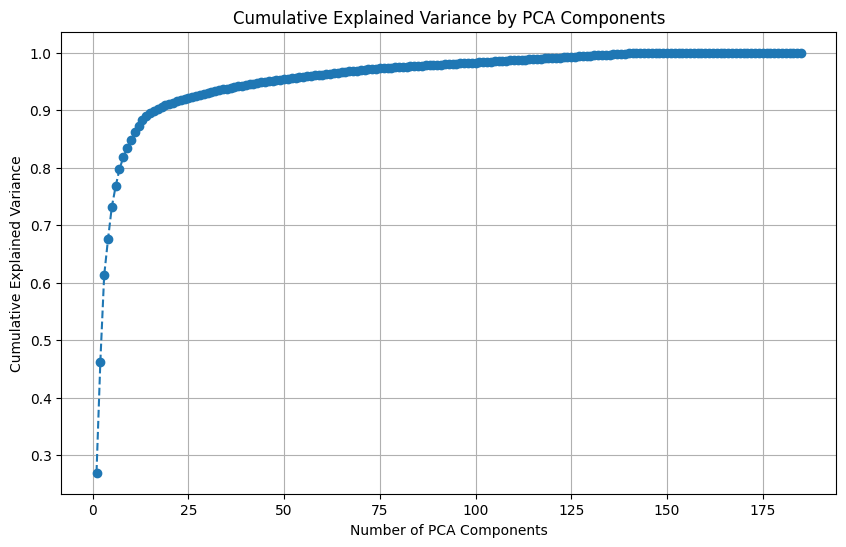

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Calculate cumulative explained variance for each number of components
pca = PCA().fit(df_preprocessed.drop(columns=['Patient ID']))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 2: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

The cumulative explained variance plot shows how many principal components are needed to capture most of the variance in the data. From the curve, it looks like the explained variance starts to level off after around 30-40 components, indicating that these components capture the majority of the variance.

In [32]:
# Step 11: Perform PCA with 30 components
# Identify non-numeric columns
non_numeric_columns = df_preprocessed.select_dtypes(exclude=[np.number]).columns.tolist()

# Remove non-numeric columns before applying PCA
df_pca = df_preprocessed.drop(columns=non_numeric_columns)

# Quality check: Make sure all columns are numerical
assert df_pca.select_dtypes(include=[np.number]).shape[1] == df_pca.shape[1], "DataFrame still contains non-numeric columns."

# Perform PCA with 30 components
pca_30 = PCA(n_components=30)
pca_data_30 = pca_30.fit_transform(df_numeric_only)

# Explained variance ratio for the 30 components
explained_variance_30 = pca_30.explained_variance_ratio_
cumulative_explained_variance_30 = explained_variance_30.cumsum()

# Output the cumulative explained variance to confirm it's above the desired threshold
print(f"Cumulative explained variance for 30 components: {cumulative_explained_variance_30[-1]:.4f}")


Cumulative explained variance for 30 components: 0.9195


In [39]:
pca_data_30

array([[ 3.73320035e-01,  1.34834786e+00,  3.96140191e-01, ...,
        -2.99121893e-03,  8.97597718e-16,  9.02377096e-17],
       [ 1.16176039e+00, -6.04269858e-01,  1.58632739e+00, ...,
        -2.36526550e-03,  1.12112211e-15, -2.27839829e-16],
       [ 2.61915318e+00, -9.82424184e-01,  9.74882702e-01, ...,
        -6.79053796e-02,  2.48860856e-15, -4.84750530e-18],
       ...,
       [-2.67930520e-01, -1.12533360e+00,  8.74496715e-01, ...,
         3.92404534e-03, -4.65057648e-16, -2.77161957e-16],
       [ 5.31996438e-01,  1.21916531e+00, -3.47256677e-01, ...,
        -6.85706045e-02, -4.00836657e-17,  9.88273457e-16],
       [-1.42376368e+00, -1.51667376e-01,  6.78528783e-01, ...,
         3.19444718e-03, -3.97085521e-16, -1.25042264e-16]])

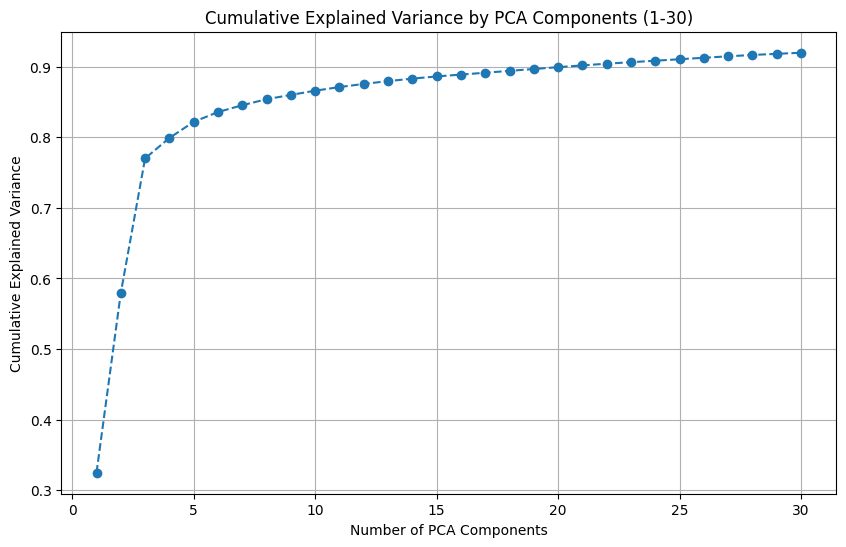

In [33]:
# Step 12: Visualize the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), cumulative_explained_variance_30, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components (1-30)')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [34]:
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Step 14: Evaluate clustering with 30 components
# Ensure the clustering was performed on the right dataset
assert pca_data_30.shape[1] == 30, "PCA data does not have 30 components."


In [37]:
df_pca

,CDKN2C,NTRK3,PIK3CG,ATR,BTK,MPL,NF1,STAT5B,H3F3A,DNMT3B,...,ATRX,AKT2,ERBB4,PDGFRA,EPHA3,CDH1,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered,Cluster_Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.136414,1.324536,0.637262,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.374840,-0.699476,1.872975,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.095015,-1.374147,2.381073,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.328134,0.649866,0.431310,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.392041,-1.374147,1.532599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1.095015,-0.470896,-0.048423,0
550,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,-1.333442,0.055077,-1.770036,2
551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-1.013908,-0.996870,0.342516,2
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.775481,1.107025,0.201926,1


<ipython-input-35-c52dbe35163e>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range_n_clusters, sse, 'bx-', color='blue')


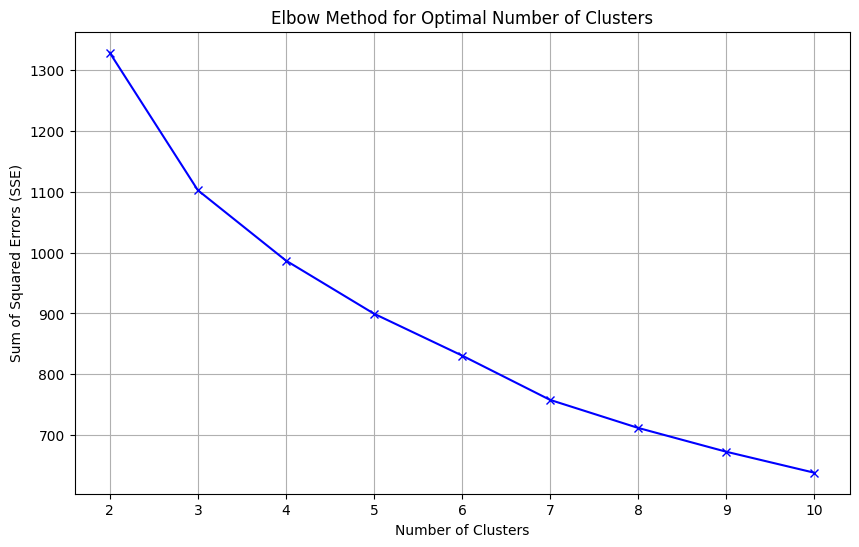

<ipython-input-35-c52dbe35163e>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "gx-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(range_n_clusters, silhouette_scores, 'gx-', color='green')


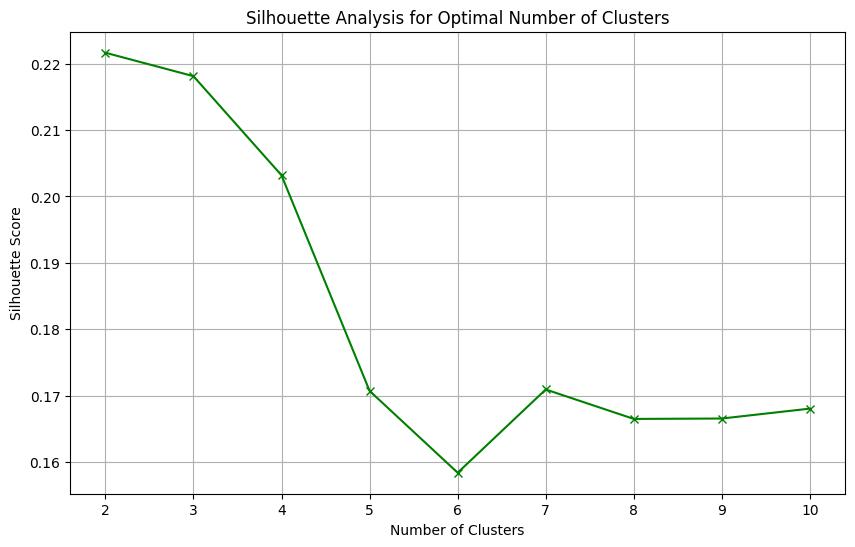

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 13: Determine the optimal number of clusters using the Elbow Method and Silhouette Analysis
sse = []  # Sum of squared errors for the Elbow Method
silhouette_scores = []  # Silhouette scores for each number of clusters
range_n_clusters = range(2, 11)  # Checking cluster sizes from 2 to 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data_30)

    # Calculate SSE
    sse.append(kmeans.inertia_)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_data_30, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, sse, 'bx-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

# Plot Silhouette Analysis results
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'gx-', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.grid()
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for 10 clusters: 0.168
Davies-Bouldin Index for 10 clusters: 1.446


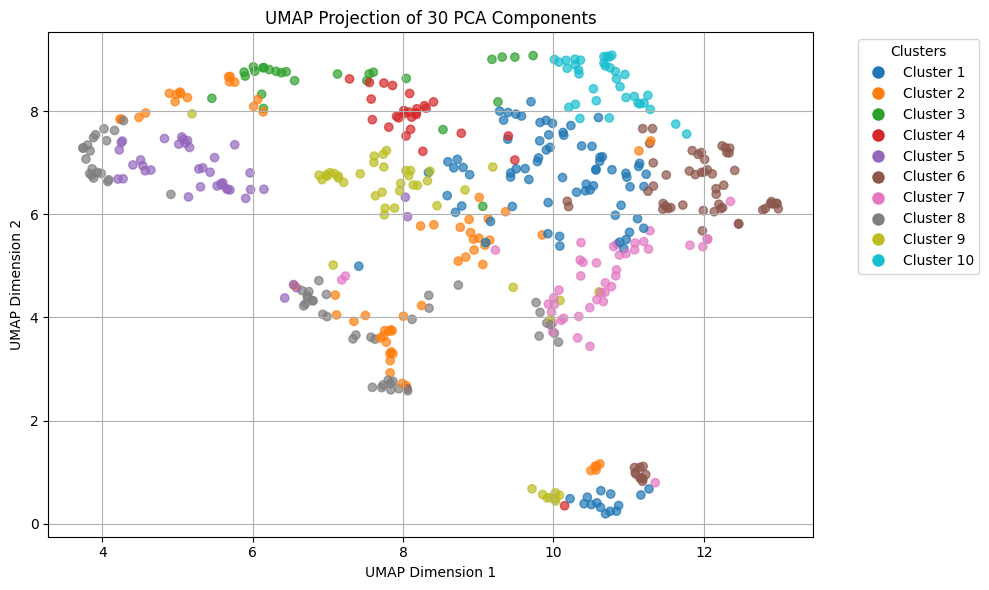

In [38]:
!pip install umap-learn
import umap
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Step 1: Perform UMAP on the PCA-reduced data (30 components)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_model.fit_transform(pca_data_30)  # Consistently named as umap_embedding

# Step 2: Evaluate clustering performance
silhouette_avg = silhouette_score(pca_data_30, cluster_labels)
davies_bouldin = davies_bouldin_score(pca_data_30, cluster_labels)

# Print performance metrics
print(f'Silhouette Score for {len(set(cluster_labels))} clusters: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for {len(set(cluster_labels))} clusters: {davies_bouldin:.3f}')

# Step 3: Plot UMAP results, colored by cluster labels
plt.figure(figsize=(10, 6))

# Use a different color map and add legend labels
scatter = plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=cluster_labels, cmap='tab10', alpha=0.7)

# Create a legend with custom labels for clusters
legend_labels = [f'Cluster {i+1}' for i in range(len(set(cluster_labels)))]
handles = [plt.Line2D([0], [0], marker='o', color='w', label=legend_labels[i],
                      markerfacecolor=scatter.cmap(i), markersize=10) for i in range(len(legend_labels))]
plt.legend(handles=handles, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('UMAP Projection of 30 PCA Components')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.grid()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for 8 clusters: 0.486
Davies-Bouldin Index for 8 clusters: 0.681


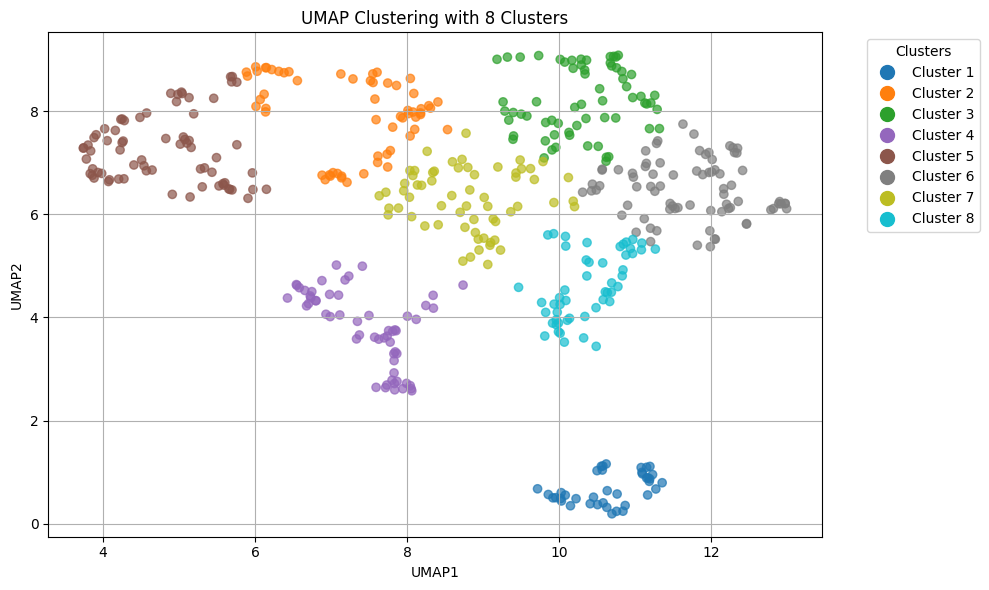

Shape of UMAP data: (482, 2)


In [40]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd

# Step 14: Perform UMAP on the PCA data with 30 components
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(pca_data_30)

# Step 15: Run KMeans clustering with 8 clusters on the UMAP-transformed data
n_clusters = 8
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_data)

# Quality check: Ensure that the number of clusters used is indeed 8
assert len(set(cluster_labels_umap)) == n_clusters, f"The number of clusters is not {n_clusters}."

# Step 16: Evaluate clustering performance
silhouette_avg = silhouette_score(umap_data, cluster_labels_umap)
davies_bouldin = davies_bouldin_score(umap_data, cluster_labels_umap)

# Print performance metrics
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for {n_clusters} clusters: {davies_bouldin:.3f}')

# Add the cluster labels to the UMAP data for visualization
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels_umap

# Step 17: Visualize the UMAP results with cluster labels
plt.figure(figsize=(10, 6))

# Plot with consistent colormap
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.7)
plt.title(f'UMAP Clustering with {n_clusters} Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid()

# Create a legend with matching colors
unique_labels = sorted(umap_df['Cluster'].unique())
handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(label / (n_clusters - 1)),
                      linestyle='None', markersize=10) for label in unique_labels]
legend_labels = [f'Cluster {label + 1}' for label in unique_labels]

plt.legend(handles, legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Final check: Output the shape of the UMAP-transformed data
print(f"Shape of UMAP data: {umap_data.shape}")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for 7 clusters: 0.495
Davies-Bouldin Index for 7 clusters: 0.680


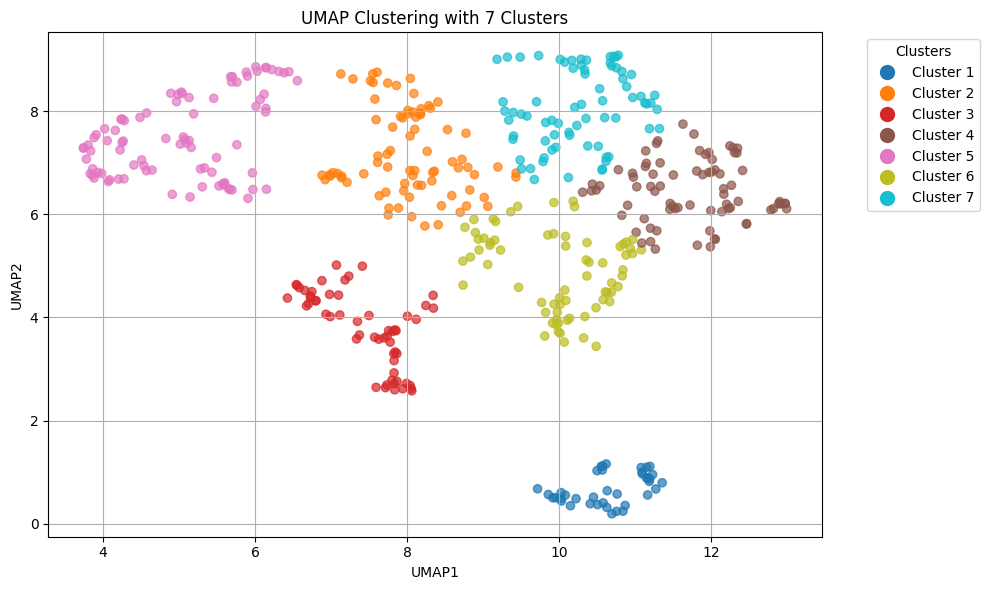

Shape of UMAP data: (482, 2)


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd

# Step 14: Perform UMAP on the PCA data with 30 components
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(pca_data_30)

# Step 15: Run KMeans clustering with 7 clusters on the UMAP-transformed data
n_clusters = 7
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_data)

# Quality check: Ensure that the number of clusters used is indeed 7
assert len(set(cluster_labels_umap)) == n_clusters, f"The number of clusters is not {n_clusters}."

# Step 16: Evaluate clustering performance
silhouette_avg = silhouette_score(umap_data, cluster_labels_umap)
davies_bouldin = davies_bouldin_score(umap_data, cluster_labels_umap)

# Print performance metrics
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for {n_clusters} clusters: {davies_bouldin:.3f}')

# Add the cluster labels to the UMAP data for visualization
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels_umap

# Step 17: Visualize the UMAP results with cluster labels
plt.figure(figsize=(10, 6))

# Plot with consistent colormap
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.7)
plt.title(f'UMAP Clustering with {n_clusters} Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid()

# Create a legend with matching colors
unique_labels = sorted(umap_df['Cluster'].unique())
handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(label / (n_clusters - 1)),
                      linestyle='None', markersize=10) for label in unique_labels]
legend_labels = [f'Cluster {label + 1}' for label in unique_labels]

plt.legend(handles, legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Final check: Output the shape of the UMAP-transformed data
print(f"Shape of UMAP data: {umap_data.shape}")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for 6 clusters: 0.479
Davies-Bouldin Index for 6 clusters: 0.691


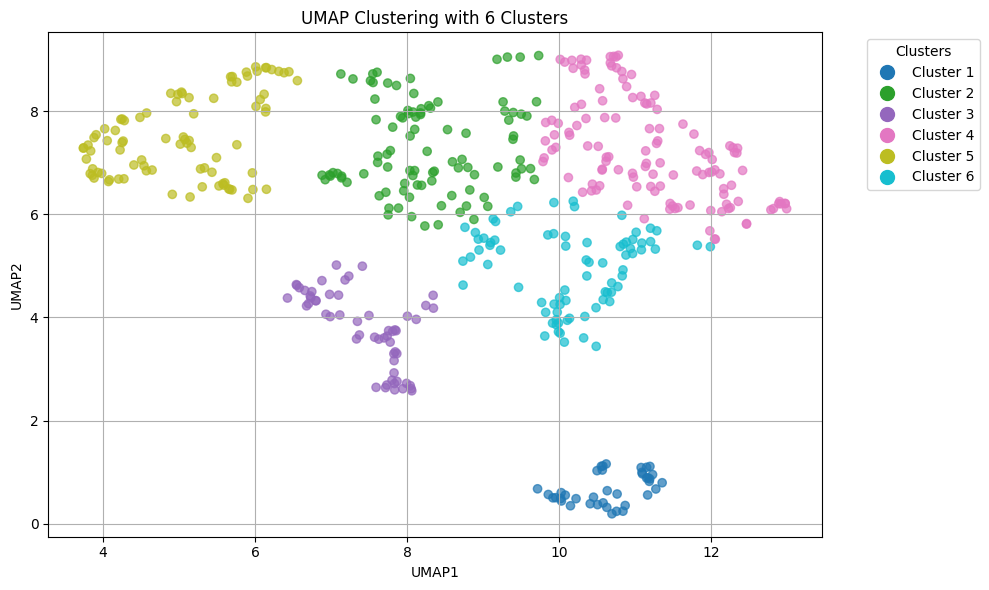

Shape of UMAP data: (482, 2)


In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd

# Step 14: Perform UMAP on the PCA data with 30 components
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(pca_data_30)

# Step 15: Run KMeans clustering with 6 clusters on the UMAP-transformed data
n_clusters = 6
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_data)

# Quality check: Ensure that the number of clusters used is indeed 6
assert len(set(cluster_labels_umap)) == n_clusters, f"The number of clusters is not {n_clusters}."

# Step 16: Evaluate clustering performance
silhouette_avg = silhouette_score(umap_data, cluster_labels_umap)
davies_bouldin = davies_bouldin_score(umap_data, cluster_labels_umap)

# Print performance metrics
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for {n_clusters} clusters: {davies_bouldin:.3f}')

# Add the cluster labels to the UMAP data for visualization
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels_umap

# Step 17: Visualize the UMAP results with cluster labels
plt.figure(figsize=(10, 6))

# Plot with consistent colormap
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.7)
plt.title(f'UMAP Clustering with {n_clusters} Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid()

# Create a legend with matching colors
unique_labels = sorted(umap_df['Cluster'].unique())
handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(label / (n_clusters - 1)),
                      linestyle='None', markersize=10) for label in unique_labels]
legend_labels = [f'Cluster {label + 1}' for label in unique_labels]

plt.legend(handles, legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Final check: Output the shape of the UMAP-transformed data
print(f"Shape of UMAP data: {umap_data.shape}")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for 5 clusters: 0.461
Davies-Bouldin Index for 5 clusters: 0.732


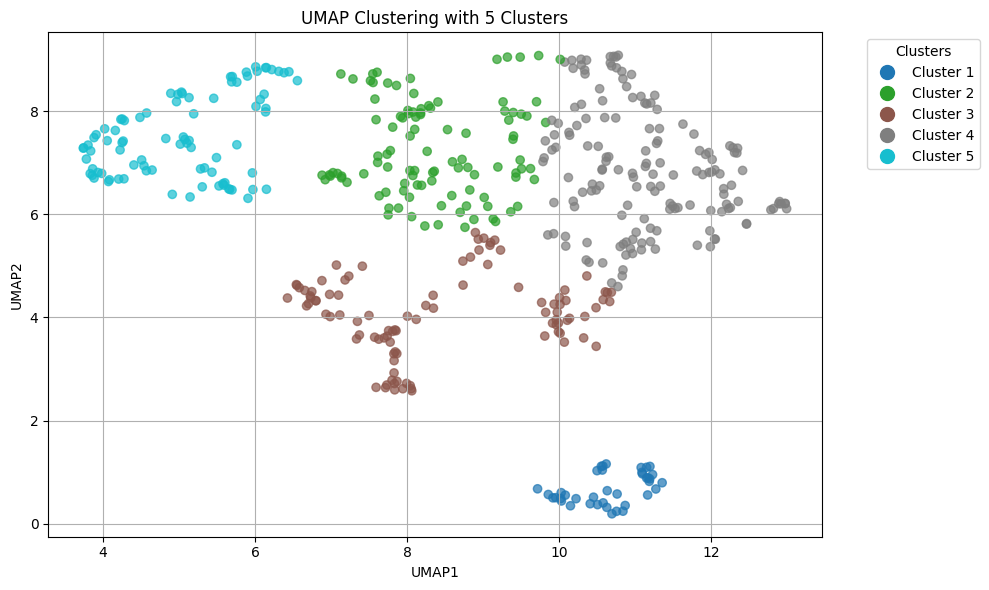

Shape of UMAP data: (482, 2)


In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd

# Step 14: Perform UMAP on the PCA data with 30 components
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(pca_data_30)

# Step 15: Run KMeans clustering with 5 clusters on the UMAP-transformed data
n_clusters = 5
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_data)

# Quality check: Ensure that the number of clusters used is indeed 5
assert len(set(cluster_labels_umap)) == n_clusters, f"The number of clusters is not {n_clusters}."

# Step 16: Evaluate clustering performance
silhouette_avg = silhouette_score(umap_data, cluster_labels_umap)
davies_bouldin = davies_bouldin_score(umap_data, cluster_labels_umap)

# Print performance metrics
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for {n_clusters} clusters: {davies_bouldin:.3f}')

# Add the cluster labels to the UMAP data for visualization
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels_umap

# Step 17: Visualize the UMAP results with cluster labels
plt.figure(figsize=(10, 6))

# Plot with consistent colormap
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.7)
plt.title(f'UMAP Clustering with {n_clusters} Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid()

# Create a legend with matching colors
unique_labels = sorted(umap_df['Cluster'].unique())
handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(label / (n_clusters - 1)),
                      linestyle='None', markersize=10) for label in unique_labels]
legend_labels = [f'Cluster {label + 1}' for label in unique_labels]

plt.legend(handles, legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Final check: Output the shape of the UMAP-transformed data
print(f"Shape of UMAP data: {umap_data.shape}")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for 4 clusters: 0.468
Davies-Bouldin Index for 4 clusters: 0.741


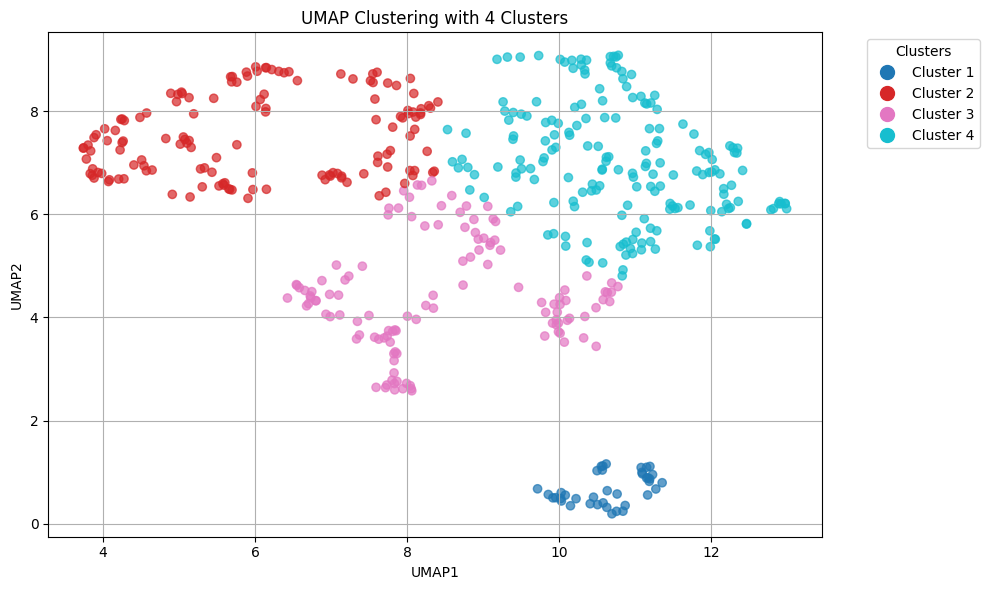

Shape of UMAP data: (482, 2)


In [45]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd

# Step 14: Perform UMAP on the PCA data with 30 components
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(pca_data_30)

# Step 15: Run KMeans clustering with 4 clusters on the UMAP-transformed data
n_clusters = 4
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_data)

# Quality check: Ensure that the number of clusters used is indeed 4
assert len(set(cluster_labels_umap)) == n_clusters, f"The number of clusters is not {n_clusters}."

# Step 16: Evaluate clustering performance
silhouette_avg = silhouette_score(umap_data, cluster_labels_umap)
davies_bouldin = davies_bouldin_score(umap_data, cluster_labels_umap)

# Print performance metrics
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for {n_clusters} clusters: {davies_bouldin:.3f}')

# Add the cluster labels to the UMAP data for visualization
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels_umap

# Step 17: Visualize the UMAP results with cluster labels
plt.figure(figsize=(10, 6))

# Plot with consistent colormap
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.7)
plt.title(f'UMAP Clustering with {n_clusters} Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid()

# Create a legend with matching colors
unique_labels = sorted(umap_df['Cluster'].unique())
handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(label / (n_clusters - 1)),
                      linestyle='None', markersize=10) for label in unique_labels]
legend_labels = [f'Cluster {label + 1}' for label in unique_labels]

plt.legend(handles, legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Final check: Output the shape of the UMAP-transformed data
print(f"Shape of UMAP data: {umap_data.shape}")


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Silhouette Score for 10 clusters: 0.473
Davies-Bouldin Index for 10 clusters: 0.727


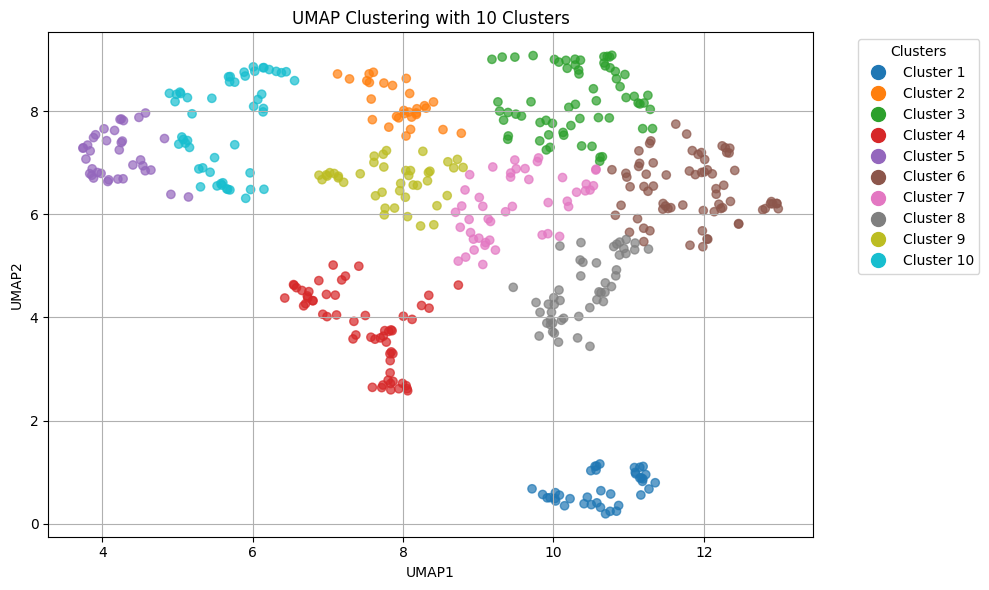

Shape of UMAP data: (482, 2)


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import umap.umap_ as umap
import matplotlib.pyplot as plt
import pandas as pd

# Step 14: Perform UMAP on the PCA data with 30 components
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_data = umap_model.fit_transform(pca_data_30)

# Step 15: Run KMeans clustering with 10 clusters on the UMAP-transformed data
n_clusters = 10
kmeans_umap = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels_umap = kmeans_umap.fit_predict(umap_data)

# Quality check: Ensure that the number of clusters used is indeed 10
assert len(set(cluster_labels_umap)) == n_clusters, f"The number of clusters is not {n_clusters}."

# Step 16: Evaluate clustering performance
silhouette_avg = silhouette_score(umap_data, cluster_labels_umap)
davies_bouldin = davies_bouldin_score(umap_data, cluster_labels_umap)

# Print performance metrics
print(f'Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for {n_clusters} clusters: {davies_bouldin:.3f}')

# Add the cluster labels to the UMAP data for visualization
umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = cluster_labels_umap

# Step 17: Visualize the UMAP results with cluster labels
plt.figure(figsize=(10, 6))

# Plot with consistent colormap
scatter = plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'], c=umap_df['Cluster'], cmap='tab10', alpha=0.7)
plt.title(f'UMAP Clustering with {n_clusters} Clusters')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.grid()

# Create a legend with matching colors
unique_labels = sorted(umap_df['Cluster'].unique())
handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(label / (n_clusters - 1)),
                      linestyle='None', markersize=10) for label in unique_labels]
legend_labels = [f'Cluster {label + 1}' for label in unique_labels]

plt.legend(handles, legend_labels, title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Final check: Output the shape of the UMAP-transformed data
print(f"Shape of UMAP data: {umap_data.shape}")


In [47]:
# Save the cleaned DataFrame
umap_df.to_csv('umap10.csv', index=False)

Label clusters to the initial df

In [63]:
# Create a new DataFrame by adding the Cluster column from umap_df to df_preprocessed
df_with_clusters = df_preprocessed.copy()
df_with_clusters['Cluster'] = umap_df['Cluster'].values

# Verify that the new DataFrame includes the Cluster column
print(df_with_clusters.head())

  Patient ID  CDKN2C  NTRK3  PIK3CG  ATR  BTK  MPL  NF1  STAT5B  H3F3A  ...  \
0  P-0000378       0      0       0    0    0    0    0       0      0  ...   
5  P-0000677       0      0       0    0    0    0    0       0      0  ...   
6  P-0000748       0      0       0    0    0    0    0       0      0  ...   
7  P-0000759       0      0       0    0    0    0    0       0      0  ...   
8  P-0000822       0      0       0    0    0    0    0       0      0  ...   

   WHO Grade_G2  WHO Grade_G3  WHO Grade_G3/G4  WHO Grade_G4  \
0         False         False            False          True   
5         False         False            False          True   
6         False          True            False         False   
7         False         False            False          True   
8         False         False            False          True   

   WHO Grade_Indeterminate  IDH Status_IDH WT  Diagnosis Age  \
0                    False               True       0.136414   
5           

Merging df with original data

In [66]:
df_grouped

,Patient ID,Hugo_Symbol,Pathway,Enhancing,WHO Grade,IDH Status,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered
0,P-0000378,[EGFR],RTK-RAS,None,G4,IDH WT,55.0,5.545777,0.1996
1,P-0000572,[ARID1A],Chromatin remodeling,None,G4,IDH WT,59.0,7.764087,NaN
2,P-0000588,[ARID1B],Chromatin remodeling,Yes,G4,IDH WT,36.0,8.873242,0.1974
3,P-0000611,[ATRX],Astrocytic drivers,Yes,G4,IDH WT,32.0,7.764087,0.2724
4,P-0000651,[AR],none,Yes,G4,IDH WT,68.0,7.764087,0.5906
...,...,...,...,...,...,...,...,...,...
665,TRF078227,[APC],none,No,G2,IDH WT,50.0,7.512508,NaN
666,TRF079053,[BAP1],none,No,G2,IDH WT,39.0,6.677785,NaN
667,TRF079056,[ARID1B],Chromatin remodeling,Yes,G4,IDH WT,28.0,6.677785,NaN
668,TRF083668,[IDH1],none,No,G3,IDH Mutant,36.0,2.504169,NaN


In [76]:
# Step 1: Filter `df_grouped` to only keep rows present in `df_with_clusters`
df_filtered = df_grouped[df_grouped['Patient ID'].isin(df_with_clusters['Patient ID'])]

# Quality check: Ensure the filtered DataFrame has the expected number of rows
assert df_filtered.shape[0] == df_with_clusters.shape[0], \
    "The number of rows in the filtered DataFrame does not match `df_with_clusters`."

# Step 2: Merge `df_filtered` and `df_with_clusters`, keeping original values in `df_filtered`
# Drop duplicate columns from `df_with_clusters`
df_combined = pd.merge(df_filtered,
                       df_with_clusters.drop(columns=[col for col in df_with_clusters.columns
                                                      if col in df_grouped.columns and col != 'Patient ID']),
                       on='Patient ID',
                       how='inner')

# Quality check: Ensure the 'Cluster' column and all original columns from `df_grouped` are present
assert 'Cluster' in df_combined.columns, "Cluster column is missing in the combined DataFrame."
print(f"Shape of the combined DataFrame: {df_combined.shape}")

# Display the first few rows of the combined DataFrame
df_combined.head()


Shape of the combined DataFrame: (482, 192)


,Patient ID,Hugo_Symbol,Pathway,Enhancing,WHO Grade,IDH Status,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered,CDKN2C,...,Pathway_p53 signaling,Enhancing_Yes,WHO Grade_G1/G2,WHO Grade_G2,WHO Grade_G3,WHO Grade_G3/G4,WHO Grade_G4,WHO Grade_Indeterminate,IDH Status_IDH WT,Cluster
0,P-0000378,[EGFR],RTK-RAS,None,G4,IDH WT,55.0,5.545777,0.1996,0,...,False,False,False,False,False,False,True,False,True,1
1,P-0000677,[EGFR],RTK-RAS,None,G4,IDH WT,47.0,2.218311,0.2998,0,...,False,False,False,False,False,False,True,False,True,3
2,P-0000748,[FGFR3],none,Yes,G3,IDH WT,70.0,1.109155,0.3410,0,...,False,True,False,False,True,False,False,False,True,3
3,P-0000759,[CUL3],none,None,G4,IDH WT,58.0,4.436621,0.1829,0,...,False,False,False,False,False,False,True,False,True,9
4,P-0000822,[CARD11],none,None,G4,IDH WT,59.0,1.109155,0.2722,0,...,False,False,False,False,False,False,True,False,True,3


In [77]:
# List current columns in the DataFrame
print("Current columns in the DataFrame:", df_combined.columns.tolist())

Current columns in the DataFrame: ['Patient ID', 'Hugo_Symbol', 'Pathway', 'Enhancing', 'WHO Grade', 'IDH Status', 'Diagnosis Age', 'TMB (nonsynonymous)', 'Fraction Genome Altered', 'CDKN2C', 'NTRK3', 'PIK3CG', 'ATR', 'BTK', 'MPL', 'NF1', 'STAT5B', 'H3F3A', 'DNMT3B', 'CALR', 'CDK12', 'GLI1', 'NOTCH3', 'PTEN', 'TRAF7', 'RAD51D', 'PMS2', 'ASXL1', 'BLM', 'PLCG2', 'CREBBP', 'PIK3R1', 'JAK1', 'LRP1B', 'FAT1', 'HIST1H1C', 'CHUK', 'FGFR3', 'CTCF', 'INPP4B', 'GPR124', 'ALK', 'SETD2', 'C11ORF30', 'GSK3B', 'PIK3C2G', 'CEBPA', 'EGFR', 'FANCG', 'APC', 'ALOX12B', 'IKZF1', 'BRCA2', 'ETV1', 'AMER1', 'REL', 'DDR2', 'KMT2B', 'MTOR', 'FANCA', 'KDM6A', 'ROS1', 'ERBB3', 'LATS1', 'ERCC2', 'BRIP1', 'HIST1H3G', 'ANKRD11', 'GRIN2A', 'INHBA', 'HNF1A', 'KMT2D', 'CDKN1A', 'DOT1L', 'ERCC4', 'IL7R', 'GATA2', 'NCOR1', 'ARID2', 'JAK3', 'ARID1A', 'DROSHA', 'ACVR1', 'ASXL2', 'POLE', 'HGF', 'FAT3', 'FGF3', 'BCL2L1', 'CCND1', 'ARID1B', 'RB1', 'SF3B1', 'MGA', 'ERG', 'CRLF2', 'FANCL', 'AR', 'DNMT3A', 'IRF4', 'KMT2A', 'BCO

In [78]:
# Save the cleaned DataFrame
df_combined.to_csv('df_combined_clusters_umap.csv', index=False)

Cluster characterisations

Summary Statistics for Continuous Features by Cluster:
  Cluster Diagnosis Age                   TMB (nonsynonymous)            \
                   mean median        std                mean    median   
0       1     57.666667   57.0   9.398581            3.116615  2.936159   
1       2     63.137931   65.0  12.813843            6.306707  6.654932   
2       3     62.140625   60.5   9.672194            3.068030  2.936159   
3       4     35.982759   35.5  10.433568            2.436258  2.218311   
4       5     30.305556   31.0   7.547259            3.554402  3.458792   
5       6     63.657143   63.5  10.036001            1.411981  1.109155   
6       7     57.152174   53.5  11.884570            3.373523  3.131812   
7       8     62.270833   62.5  10.075755            2.987364  2.936159   
8       9     56.829268   58.0   7.628573            5.306701  4.893598   
9      10     36.176471   35.0   8.238218            4.722291  4.893598   

            Fraction Genome Altered         

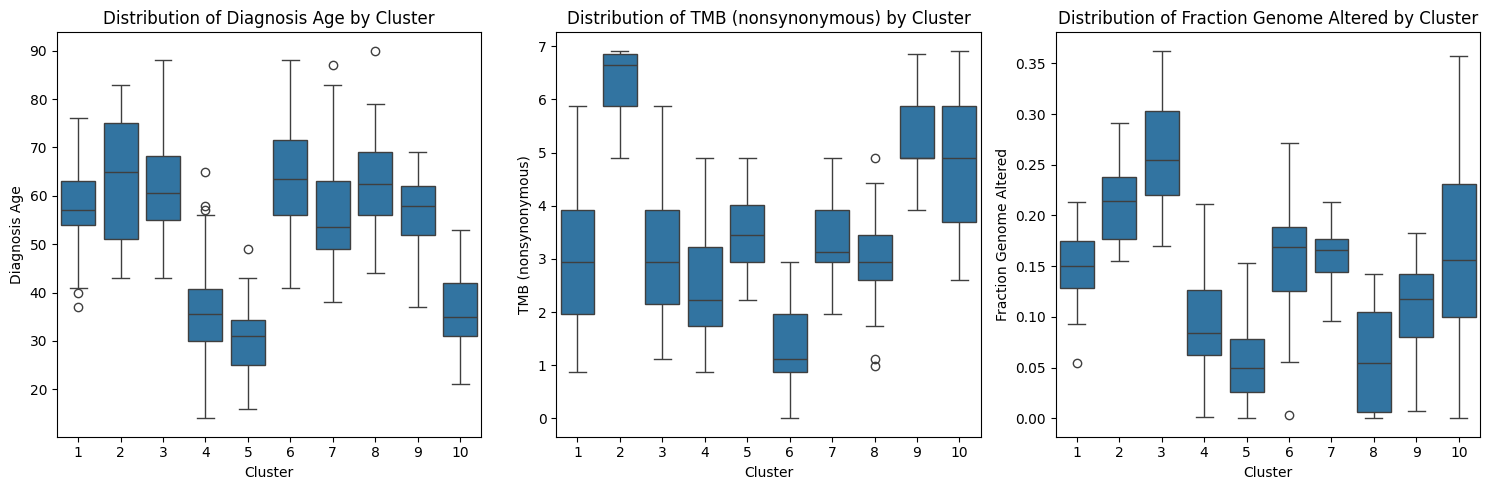

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Calculate summary statistics for continuous features within each cluster
continuous_features = ['Diagnosis Age', 'TMB (nonsynonymous)', 'Fraction Genome Altered']
summary_stats = df_combined.groupby('Cluster')[continuous_features].agg(['mean', 'median', 'std']).reset_index()

# Display the summary statistics
print("Summary Statistics for Continuous Features by Cluster:")
print(summary_stats)

# Step 3: Visualization - Box plots for the distribution of continuous features across clusters
plt.figure(figsize=(15, 5))

# Plot each continuous feature
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Cluster', y=feature, data=df_combined)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


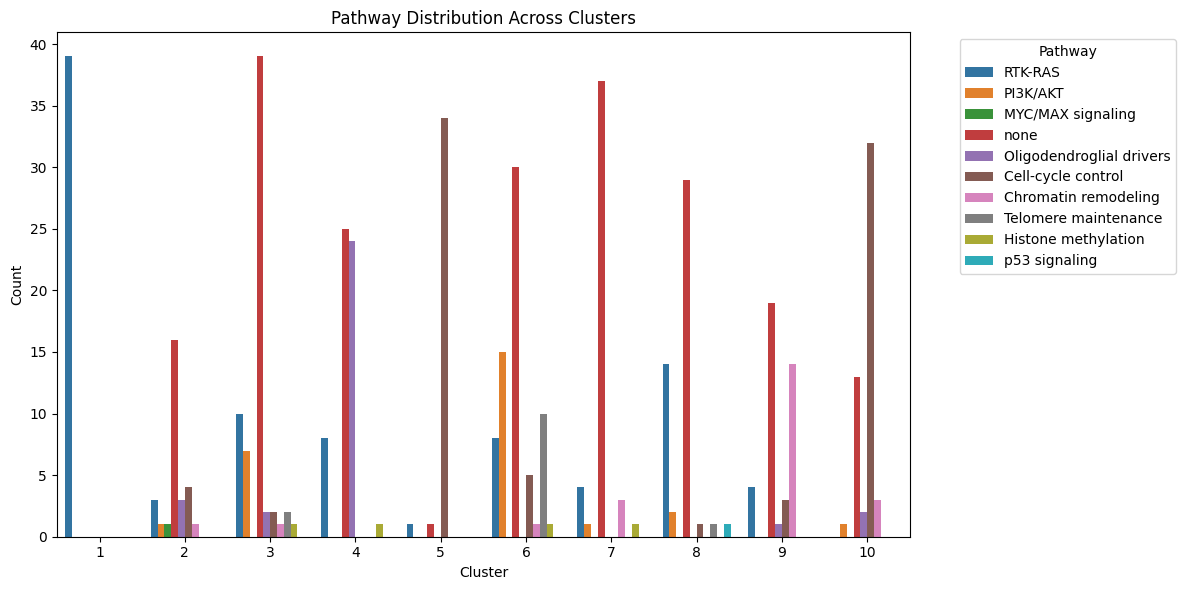

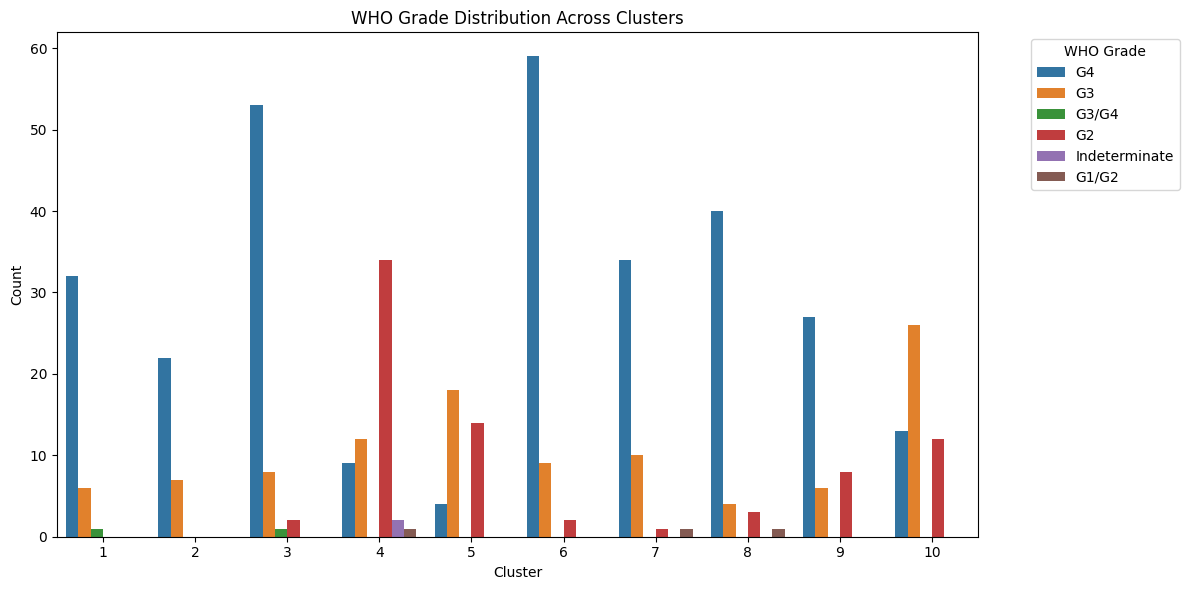

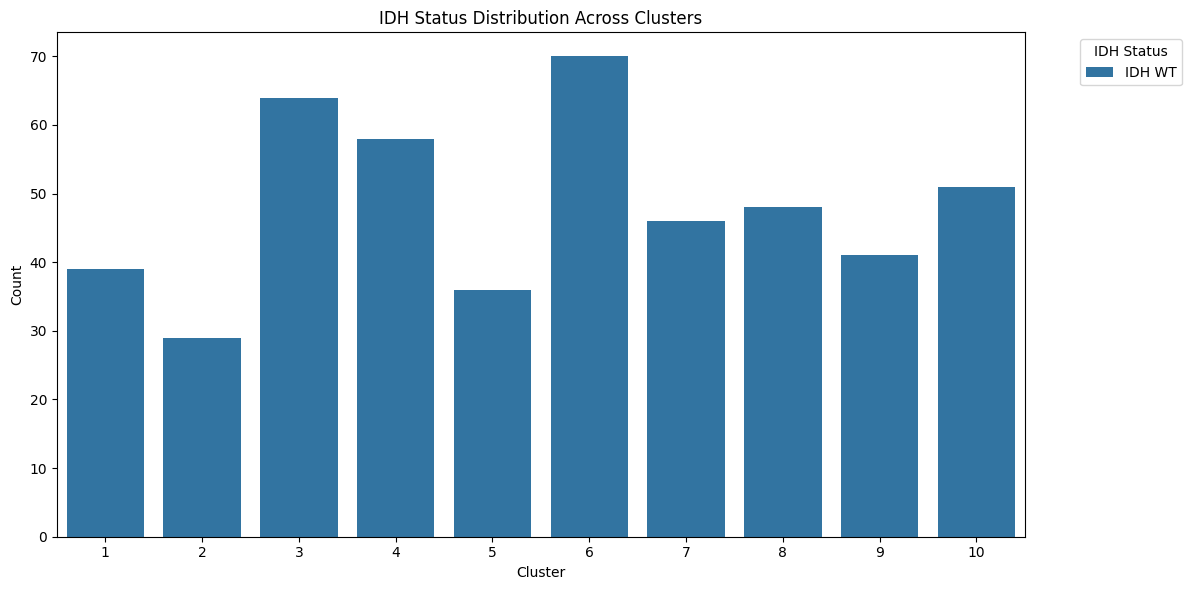

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1.1: Categorical Analysis for Pathway (using the one-hot encoded columns)
pathway_columns = [col for col in df_combined.columns if 'Pathway_' in col]
df_combined['Pathway'] = df_combined[pathway_columns].idxmax(axis=1).str.replace('Pathway_', '')

plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Pathway', data=df_combined)
plt.title('Pathway Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Pathway', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 1.2: Categorical Analysis for WHO Grade (using the one-hot encoded columns)
who_grade_columns = [col for col in df_combined.columns if 'WHO Grade_' in col]
df_combined['WHO Grade'] = df_combined[who_grade_columns].idxmax(axis=1).str.replace('WHO Grade_', '')

plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='WHO Grade', data=df_combined)
plt.title('WHO Grade Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='WHO Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 1.3: Categorical Analysis for IDH Status (using the one-hot encoded columns)
idh_status_columns = [col for col in df_combined.columns if 'IDH Status_' in col]
df_combined['IDH Status'] = df_combined[idh_status_columns].idxmax(axis=1).str.replace('IDH Status_', '')

plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='IDH Status', data=df_combined)
plt.title('IDH Status Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='IDH Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


try hierarchical clustering

In [120]:
df_preprocessed

,Patient ID,CDKN2C,NTRK3,PIK3CG,ATR,BTK,MPL,NF1,STAT5B,H3F3A,...,WHO Grade_G2,WHO Grade_G3,WHO Grade_G3/G4,WHO Grade_G4,WHO Grade_Indeterminate,IDH Status_IDH WT,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered,Cluster
0,P-0000378,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,0.136414,1.324536,0.637262,0
5,P-0000677,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,-0.374840,-0.699476,1.872975,2
6,P-0000748,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,True,1.095015,-1.374147,2.381073,2
7,P-0000759,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,0.328134,0.649866,0.431310,8
8,P-0000822,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,0.392041,-1.374147,1.532599,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,P-0019603,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,1.095015,-0.470896,-0.048423,5
550,P-0019638,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,True,-1.333442,0.055077,-1.770036,4
551,P-0019642,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,True,-1.013908,-0.996870,0.342516,0
552,P-0019643,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,True,0.775481,1.107025,0.201926,8


In [121]:
import pandas as pd

# Step 1: Convert True/False columns to 0/1 in df_preprocessed
df_hierarchy = df_preprocessed.copy()
df_hierarchy = df_hierarchy.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Step 2: Drop the 'Cluster' column and keep 'Patient ID' separate
patient_ids = df_hierarchy['Patient ID']
df_hierarchy = df_hierarchy.drop(columns=['Patient ID', 'Cluster'])

# Step 3: Ensure all remaining columns are numeric
numeric_columns = df_hierarchy.select_dtypes(include=[int, float]).columns
df_hierarchy = df_hierarchy[numeric_columns]

# Step 4: Re-attach the 'Patient ID' for reference (if needed later)
df_hierarchy['Patient ID'] = patient_ids.reset_index(drop=True)

# Final check: Output the shape of the new DataFrame
print(f"Shape of df_hierarchy: {df_hierarchy.shape}")


Shape of df_hierarchy: (482, 186)


<ipython-input-121-8ac5c2a6622f>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_hierarchy = df_hierarchy.applymap(lambda x: 1 if x is True else (0 if x is False else x))


In [122]:
df_hierarchy

,CDKN2C,NTRK3,PIK3CG,ATR,BTK,MPL,NF1,STAT5B,H3F3A,DNMT3B,...,WHO Grade_G2,WHO Grade_G3,WHO Grade_G3/G4,WHO Grade_G4,WHO Grade_Indeterminate,IDH Status_IDH WT,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered,Patient ID
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.136414,1.324536,0.637262,P-0000378
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,-0.374840,-0.699476,1.872975,P-0000841
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1.095015,-1.374147,2.381073,P-0000906
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.328134,0.649866,0.431310,P-0000960
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.392041,-1.374147,1.532599,P-0001049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1.095015,-0.470896,-0.048423,NaN
550,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,-1.333442,0.055077,-1.770036,NaN
551,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,-1.013908,-0.996870,0.342516,NaN
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.775481,1.107025,0.201926,NaN


In [123]:
# Save the cleaned DataFrame
df_hierarchy.to_csv('df_hierarchy.csv', index=False)

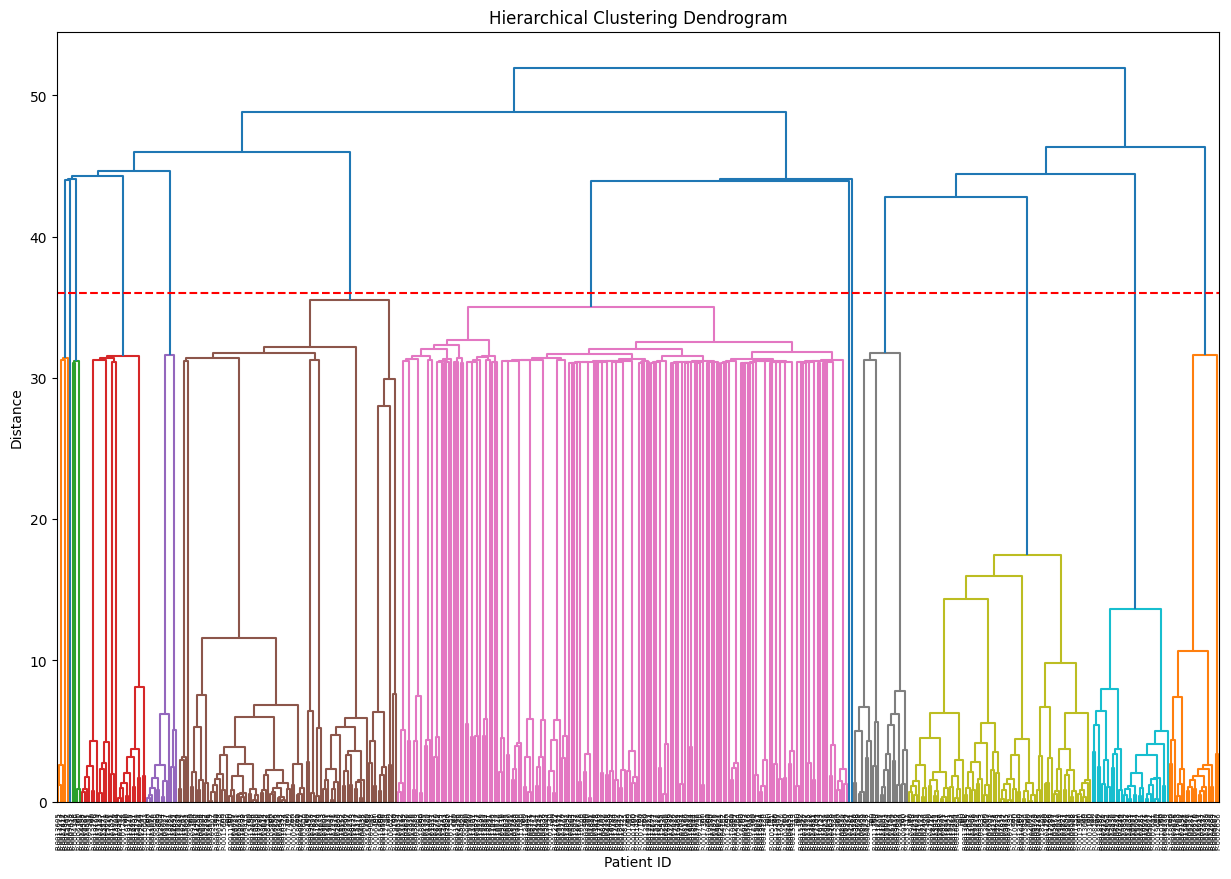

In [110]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Step 1: Standardize the features for clustering
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = df_hierarchy.drop(columns=['Patient ID']).values
features_scaled = scaler.fit_transform(features)

# Step 2: Perform hierarchical clustering using the 'ward' method
linked = linkage(features_scaled, method='ward')

# Step 3: Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(linked,
           orientation='top',
           labels=df_hierarchy['Patient ID'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Patient ID')
plt.ylabel('Distance')
plt.axhline(y=36, color='r', linestyle='--')  # Adjust this line to help visualize clusters
plt.show()




In [111]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, cophenet
import numpy as np

# Step 1: Calculate the distance matrix using the features scaled previously
distance_matrix = pdist(df_hierarchy.drop(columns='Patient ID'), metric='euclidean')

# Step 2: Perform hierarchical clustering using the 'ward' method
linked = linkage(distance_matrix, method='ward')

# Step 3: Calculate the cophenetic correlation coefficient
coph_corr, _ = cophenet(linked, pdist(df_hierarchy.drop(columns='Patient ID')))
print(f'Cophenetic Correlation Coefficient: {coph_corr:.3f}')

# Step 4: Calculate Silhouette Score and Davies-Bouldin Index
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assign clusters (you can choose a number based on your dendrogram analysis)
# For example, let's assume you want to create 4 clusters based on your analysis.
from scipy.cluster.hierarchy import fcluster

n_clusters = 13  # Change this as needed based on your analysis
clusters = fcluster(linked, n_clusters, criterion='maxclust')

# Calculate the silhouette score and Davies-Bouldin index
silhouette_avg = silhouette_score(df_hierarchy.drop(columns='Patient ID'), clusters)
davies_bouldin = davies_bouldin_score(df_hierarchy.drop(columns='Patient ID'), clusters)

# Print performance metrics
print(f'Silhouette Score for hierarchical clustering: {silhouette_avg:.3f}')
print(f'Davies-Bouldin Index for hierarchical clustering: {davies_bouldin:.3f}')


Cophenetic Correlation Coefficient: 0.457
Silhouette Score for hierarchical clustering: 0.120
Davies-Bouldin Index for hierarchical clustering: 1.857


In [95]:
df_hierarchy

,CDKN2C,NTRK3,PIK3CG,ATR,BTK,MPL,NF1,STAT5B,H3F3A,DNMT3B,...,WHO Grade_G3,WHO Grade_G3/G4,WHO Grade_G4,WHO Grade_Indeterminate,IDH Status_IDH WT,Diagnosis Age,TMB (nonsynonymous),Fraction Genome Altered,Patient ID,Cluster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.136414,1.324536,0.637262,P-0000378,123
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,-0.374840,-0.699476,1.872975,P-0000841,123
6,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1.095015,-1.374147,2.381073,P-0000906,97
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.328134,0.649866,0.431310,P-0000960,88
8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.392041,-1.374147,1.532599,P-0001049,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1.095015,-0.470896,-0.048423,NaN,22
550,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1.333442,0.055077,-1.770036,NaN,4
551,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,-1.013908,-0.996870,0.342516,NaN,117
552,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.775481,1.107025,0.201926,NaN,19
